In [1]:
import pandas as pd
import os
from glob import glob
import seaborn as sea
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt


`# Instructions
1. Create a new folder for your run. 
2. Before you drive, Save your VE table in that folder as 've.table'
3. Log your run (in ASCII format) as "log.msl"
4. Use thse functions to do things: 
    

In [2]:
def get_file(filename):

    with open(filename, errors = 'ignore') as f:
        data = f.read()
        
    data = data.split('\n')[2:]
    data = '\n'.join(data)
    with open('temp.csv', 'w') as f:
        f.write(data)
        
    data = pd.read_csv('temp.csv', sep = '\t', low_memory=False)
    dtypes = data.iloc[0]
    data = data.iloc[1:]
    
    for column in data.columns:
        try:
            data[column] = pd.to_numeric(data[column])
        except ValueError as e:
            pass
    data['Load'] = data['MAP']
    data['afr_target'] = data['AFR Target']
    data['Fuel: Accel enrich'] = data['Accel Enrich'] 
    data['true_target']  = data['afr_target'] * (1 - (data["Fuel: Accel enrich"]/100 - 1))
    data['error'] = data['AFR']- data['true_target']
    
    return data


In [3]:
def get_table(filename):
    

    tree = ET.parse(filename + '.table')
    
    
    for thing in tree.getiterator():
        if ('zValues' in thing.tag) and ('tableData' not in thing.tag):
            raw_data = thing.text

        if 'xAxis'in thing.tag:
            x_axis = thing.text
            x_axis = x_axis.strip().replace(' ', '').split('\n')
        if 'yAxis' in thing.tag:
            y_axis = thing.text
            y_axis = y_axis.strip().replace(' ', '').split('\n')


    rows = raw_data.strip().split('\n')
    raw_data_table = []

    for row in rows:
        vals = row.strip().split(' ')

        raw_data_table.append([float(x) for x in vals])

    data = pd.DataFrame(columns= [float(x) for x in x_axis], index= [float(y) for y in y_axis], data = raw_data_table )
    
    return data



In [48]:
    with open('run_2.msl', errors = 'ignore') as f:
        data = f.read()

<AxesSubplot:>

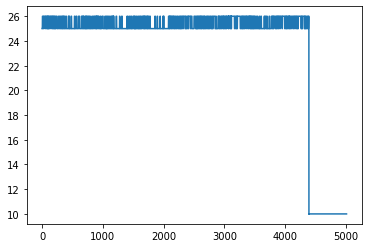

In [81]:
data['Load'].plot()

5012


<AxesSubplot:>

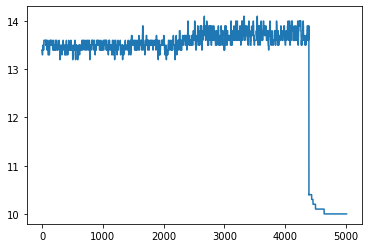

In [52]:
data = get_file('run_1.msl')
print(len(data))
#data = data[data['AFR'] > 10.5]
data["AFR"].plot()

In [68]:
for index in data.index:
    x = data.loc[index, 'Time']
    if 'mark' in x.lower():
        print(index)

4394
4395
4396


<AxesSubplot:>

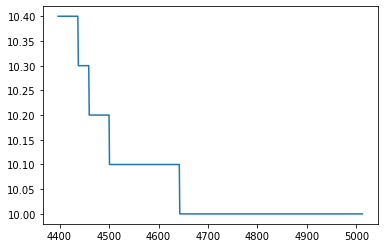

In [76]:
data.loc[4394:]['AFR'].plot()